<a href="https://colab.research.google.com/github/td-02/helmet_detection/blob/main/helmet_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Custom Training the YOLOv8

In [ ]:
pip install ultralytics

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


importing YOLO


In [ ]:
from ultralytics import YOLO

from IPython.display import display,Image

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Training YOLO v8 from custom helmet datset


In [ ]:
%cd /content/drive/MyDrive/helmet

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=800 plots=True

/content/drive/MyDrive/helmet
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [ ]:
!ls  runs/detect/train2

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch750.jpg
events.out.tfevents.1694845513.b2dae3c106f2.5535.0  train_batch751.jpg
F1_curve.png					    train_batch752.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


Validating the dataset

In [ ]:
%cd /content/drive/MyDrive/helmet

!yolo task=detect mode=val model=/content/drive/MyDrive/helmet/runs/detect/train2/weights/best.pt data=data.yaml

/content/drive/MyDrive/helmet
2023-09-20 16:50:24.128707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 16:50:25.005381: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 30.1MB/s]
val: Scanning /content/drive/MyDrive/helmet/valid/labels.cache... 142 images, 0 backgrounds, 0 corrupt: 100% 142/142 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:22<00:00,  2.55s/it]
                   all        142       1064      0.714      

Custom Infernce with the model

In [ ]:
%cd /content/drive/MyDrive/helmet
!yolo task=detect mode=predict model=/content/drive/MyDrive/helmet/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/helmet/valid/images save=True


/content/drive/MyDrive/helmet
2023-09-20 16:51:08.669249: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 16:51:09.530613: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/142 /content/drive/MyDrive/helmet/valid/images/013_107_jpeg.rf.67e4ab700429b1c3793809d8458d0dd6.jpg: 800x800 2 1s, 1 4, 24.6ms
image 2/142 /content/drive/MyDrive/helmet/valid/images/013_10_jpeg.rf.89e0e027f1c8e1c4607d526912f6b9b8.jpg: 800x800 1 0, 5 1s, 2 4s, 24.7ms
image 3/142 /content/drive/MyDrive/helmet/valid/images/013_110_jpeg.rf.4367b3a40bdc

Testing the model


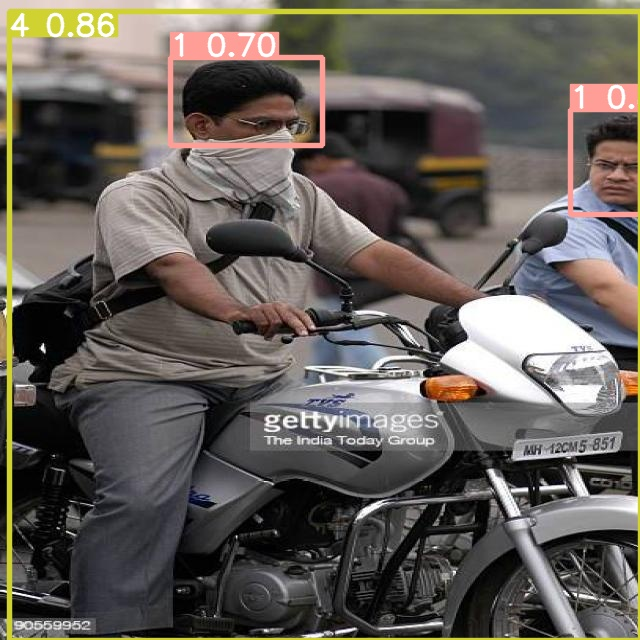

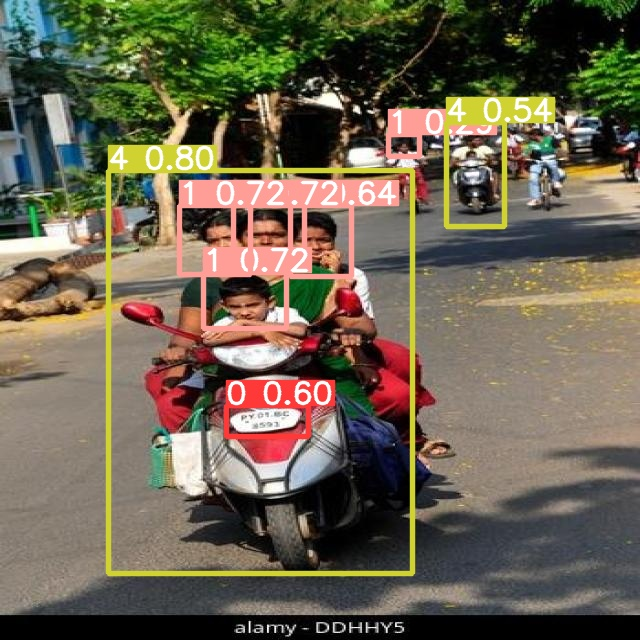

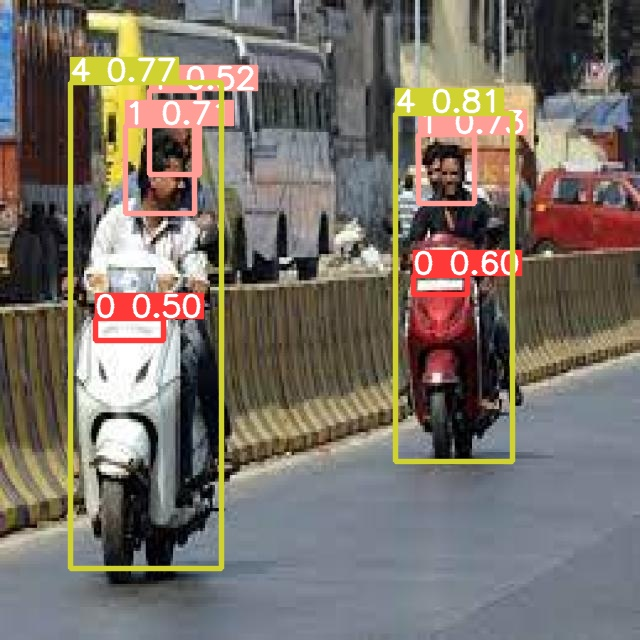

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/helmet/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")